In [2]:
import pandas as pd 
dataset = pd.read_csv('./archive/flat-prices.csv')

In [3]:
dataset


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287191,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287192,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287193,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287194,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [4]:
categorical_variables = pd.get_dummies(dataset.loc[:, ['flat_model', 'flat_type', 'block', 'storey_range', 'town', 'month', 'street_name'] ])

In [5]:
new_ds = pd.concat([categorical_variables, dataset.loc[:, ['floor_area_sqm', 'resale_price']]], axis=1)
x = new_ds.iloc[:, :-1]
y = new_ds.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
ypreds = lr.predict(x_test)

In [11]:
import numpy as np 
y_test.values

array([ 80000, 138200, 138000, ..., 111000, 560000,  55000], dtype=int64)

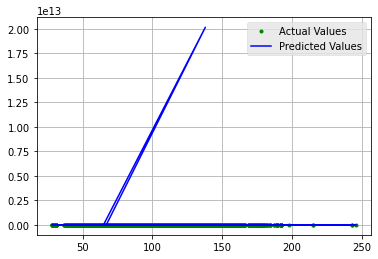

In [12]:
import matplotlib.pyplot as plt 
plt.plot(x_test.floor_area_sqm, y_test.values, '.g', label="Actual Values")
plt.plot(x_test.floor_area_sqm, lr.predict(x_test), '-b', label="Predicted Values")
plt.style.use('ggplot')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
lr.score(x_train, y_train)

0.9432925795043965

In [14]:
reg = LinearRegression()
reg.fit(x_test, y_test)

LinearRegression()

In [15]:
reg.score(x_test, y_test)

0.9450055047282269